Import Library

In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

CNN Network

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output


Training

In [3]:
def train(model, device, train_loader, optimizer, epoch , log_interval , dry_run):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            if dry_run:
                break

Fast Forward

In [4]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

Hyper Parameter

In [5]:
training_eneble = True
batch_size      = 64
test_batch_size = 1000
epochs          = 10
lr              = 0.8
lr_gamma        = 0.7
dry_run         = False
seed            = 1
log_interval    = 10

exec

In [6]:
if training_eneble:
    use_cuda = torch.cuda.is_available()

    torch.manual_seed(seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    train_kwargs = {'batch_size': batch_size}
    test_kwargs = {'batch_size': test_batch_size}
    if use_cuda:
        cuda_kwargs = {'num_workers': 1,
                       'pin_memory': True,
                       'shuffle': True}
        train_kwargs.update(cuda_kwargs)
        test_kwargs.update(cuda_kwargs)

    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
    dataset1 = datasets.MNIST('./data', train=True, download=True,
                       transform=transform)
    dataset2 = datasets.MNIST('./data', train=False,
                       transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
    test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

    model = Net().to(device)
    optimizer = optim.Adadelta(model.parameters(), lr=lr)

    scheduler = StepLR(optimizer, step_size=1, gamma=lr_gamma )
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch,log_interval , dry_run)
        test(model, device, test_loader)
        scheduler.step()

    torch.save(model.state_dict(), "mnist_cnn.pt")

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.305400
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.228136
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.986216
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.497111
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.310251
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.405873
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.316679
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.229209
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.537394
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.188025
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.277040
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.340112
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.149478
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.209530
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.231844
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.122146
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.264945
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.121939
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.395334
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.267002
Train Epoch: 1 [12800/60000 (

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.070692
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.075692
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.121170
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.117233
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.056090
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.083405
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.024003
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.007876
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.021552
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.033364
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.126576
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.045231
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.006556
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.046705
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.076373
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.022987
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.021575
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.051360
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.064897
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.016102


Train Epoch: 4 [28800/60000 (48%)]	Loss: 0.008791
Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.012663
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.005811
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.014774
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.005064
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.128354
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.007157
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.038215
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.011237
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.024784
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.037519
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.039619
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.008851
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.048603
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.122451
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.093422
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.005389
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.066724
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.014921
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.021883


Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.068728
Train Epoch: 6 [13440/60000 (22%)]	Loss: 0.002533
Train Epoch: 6 [14080/60000 (23%)]	Loss: 0.006805
Train Epoch: 6 [14720/60000 (25%)]	Loss: 0.028180
Train Epoch: 6 [15360/60000 (26%)]	Loss: 0.014979
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.013968
Train Epoch: 6 [16640/60000 (28%)]	Loss: 0.055749
Train Epoch: 6 [17280/60000 (29%)]	Loss: 0.000364
Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.004273
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.004091
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.041563
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.084394
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.000527
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.029849
Train Epoch: 6 [21760/60000 (36%)]	Loss: 0.001891
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.007581
Train Epoch: 6 [23040/60000 (38%)]	Loss: 0.093297
Train Epoch: 6 [23680/60000 (39%)]	Loss: 0.015573
Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.000274
Train Epoch: 6 [24960/60000 (42%)]	Loss: 0.013015


Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.078301
Train Epoch: 7 [58240/60000 (97%)]	Loss: 0.033827
Train Epoch: 7 [58880/60000 (98%)]	Loss: 0.000700
Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.000153

Test set: Average loss: 0.0276, Accuracy: 9911/10000 (99%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.002711
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.001361
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.023600
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.067919
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.004164
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.026567
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.002316
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.003210
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.148528
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.024200
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.111247
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.173384
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.003131
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.001626
Train Epoch: 8 [8960/60000 (15%)]	Loss: 0.009447
Train Epoch: 8 [9

Train Epoch: 9 [41600/60000 (69%)]	Loss: 0.044367
Train Epoch: 9 [42240/60000 (70%)]	Loss: 0.012510
Train Epoch: 9 [42880/60000 (71%)]	Loss: 0.022865
Train Epoch: 9 [43520/60000 (72%)]	Loss: 0.065537
Train Epoch: 9 [44160/60000 (74%)]	Loss: 0.004082
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.010629
Train Epoch: 9 [45440/60000 (76%)]	Loss: 0.027292
Train Epoch: 9 [46080/60000 (77%)]	Loss: 0.015803
Train Epoch: 9 [46720/60000 (78%)]	Loss: 0.057479
Train Epoch: 9 [47360/60000 (79%)]	Loss: 0.040147
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.017213
Train Epoch: 9 [48640/60000 (81%)]	Loss: 0.019484
Train Epoch: 9 [49280/60000 (82%)]	Loss: 0.002012
Train Epoch: 9 [49920/60000 (83%)]	Loss: 0.005223
Train Epoch: 9 [50560/60000 (84%)]	Loss: 0.015369
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.026591
Train Epoch: 9 [51840/60000 (86%)]	Loss: 0.001254
Train Epoch: 9 [52480/60000 (87%)]	Loss: 0.003368
Train Epoch: 9 [53120/60000 (88%)]	Loss: 0.003861
Train Epoch: 9 [53760/60000 (90%)]	Loss: 0.092981


In [8]:
model.load_state_dict(torch.load("mnist_cnn.pt"))

<All keys matched successfully>

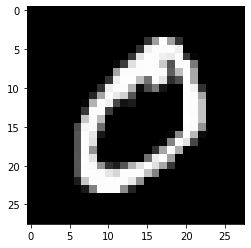

In [14]:
import matplotlib.pyplot as plt
sample0, _ = dataset1[1]
plt.imshow(sample0.numpy()[0], cmap='gray')

In [19]:
model.eval()
print(model(sample0))

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [32, 1, 3, 3], but got 3-dimensional input of size [1, 28, 28] instead